# Building Prediction Models for Human Activity Recognition

Prava and Matt

# About the Dataset

The Human Activity Recognition dataset consists of accelerometer and gyroscope data, recorded with a smartphone, of thirty people doing six tasks: walking, walking upstairs, walking downstairs, sitting, standing, and lying down. 

# Predictors

 * 561 predictors. 
 * The time-series smartphone data was filtered and broken up into 2.56s windows, with 50% overlap between each window. Features such as mean, median, correlation, etc. were calculated for acceleration in X, Y, and Z directions. Also, the Fast Fourier Transform was applied to transform into frequency-series data, and statistics were calculated from that.


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import neighbors, tree, svm, metrics
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from IPython.display import Image  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import pydotplus

# Reading and Parsing Data

In [11]:
train = pd.read_csv("./data/train.csv")  
test = pd.read_csv("./data/test.csv")
x_data = train.drop('Activity', 1)
y_data = train['Activity']
x_test = test.drop('Activity', 1)
y_test = test['Activity']

## Function Definitions

In [26]:
def get_correct_rate(X, Y, classifier):
    """
    Returns the correct rate of a given pre-trained classifier.
    """
    prediction = classifier.predict(X)
    correct_list=prediction==Y
    return sum(correct_list)/len(correct_list)

def knn_fit(X, Y, X_test, Y_test, k_list):
    """
    Returns the correct prediction rates of kNN models for the given values of K.
    """
    correct_rates = []
    for k in k_list:
        k_classifier = sk.neighbors.KNeighborsClassifier(n_neighbors=k)
        k_classifier.fit(X, Y)
        correct_rates.append(get_correct_rate(X_test, Y_test, k_classifier))
    return correct_rates

# Full Dataset

# KNN

In [27]:
k_vals = [2, 5, 10, 15, 25, 50, 75, 100]
correct_rates = knn_fit(x_data, y_data, x_test, y_test, k_vals)

print('Maximum success rate:', "{0:.1f}%".format(100*max(correct_rates)))
print('Optimal value of k:', k_vals[correct_rates.index(max(correct_rates))])

('Maximum success rate:', '0.0%')
('Optimal value of k:', 2)


# LDA

In [25]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_data, y_data)
lda_correct = get_correct_rate(x_test, y_test, lda)
print("LDA correct rate:", "{0:.1f}%".format(lda_correct*100))

LDA correct rate: 96.4%


/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Plotting LDA

/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


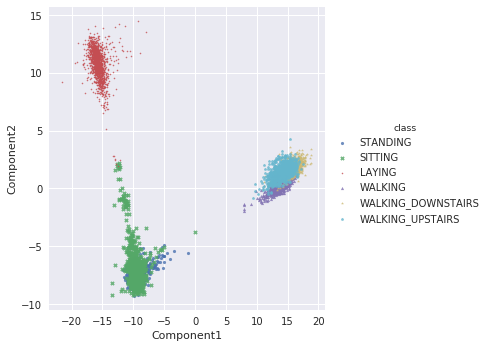

In [26]:
predicted_train = lda.predict(x_data)
transform_points = lda.fit_transform(x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


# SVM

In [27]:
clf = sk.svm.SVC()
clf.fit(x_data, y_data)  
pred1 = clf.predict(x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

0.9307770614183916


# Tree-Based

In [28]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(x_data, y_data)
pred2 = clf1.predict(x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

0.8574821852731591


### Visualizing Tree-Based

In [29]:
dot_data = sk.externals.six.StringIO()

tree.export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# Splitting Up Time and Frequency Data

In [6]:
frequency = [col for col in train if col.startswith('f')]
time = [col for col in train if col.startswith('t')]
freq_x_data = train[frequency]
time_x_data = train[time]
freq_x_test = test[frequency]
time_x_test = test[time]

y_data = train['Activity']
y_test = test['Activity']

### KNN

In [15]:
correct_rates_time = knn_fit(time_x_data, y_data, time_x_test, y_test, k_vals)

print('Maximum success rate with time predictors:', "{0:.1f}%".format(100*max(correct_rates_time)))
print('Optimal value of k:', k_vals[correct_rates_time.index(max(correct_rates_time))])

correct_rates_freq = knn_fit(freq_x_data, y_data, freq_x_test, y_test, k_vals)

print('Maximum success rate with freq predictors:', "{0:.1f}%".format(100*max(correct_rates_freq)))
print('Optimal value of k:', k_vals[correct_rates_freq.index(max(correct_rates_freq))])


Maximum success rate with time predictors: 88.2%
Optimal value of k: 15
Maximum success rate with freq predictors: 79.3%
Optimal value of k: 25


# LDA

In [32]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(time_x_data, y_data)
lda_correct_time = get_correct_rate(time_x_test, y_test, lda)
print("LDA correct rate with time predictors:", "{0:.1f}%".format(lda_correct_time*100))

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(freq_x_data, y_data)
lda_correct_freq = get_correct_rate(freq_x_test, y_test, lda)
print("LDA correct rate with frequency predictors:", "{0:.1f}%".format(lda_correct_freq*100))

/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA correct rate with time predictors: 96.3%
LDA correct rate with frequency predictors: 86.8%


## Plotting LDA

/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


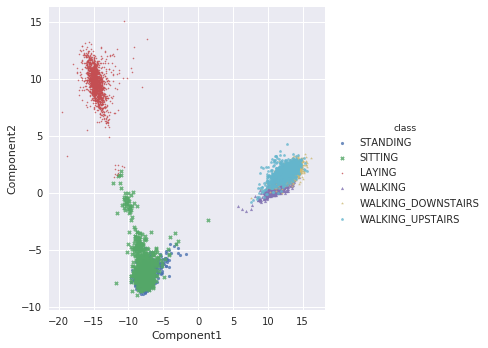

In [33]:
lda.fit(time_x_data, y_data)
predicted_train = lda.predict(time_x_data)
transform_points = lda.fit_transform(time_x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


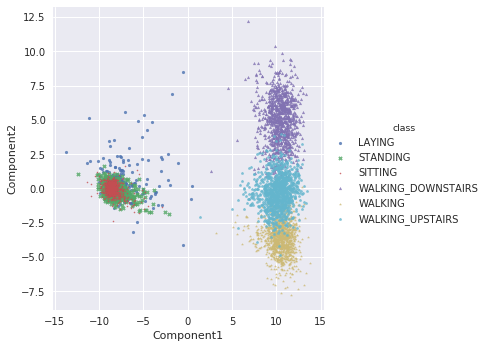

In [34]:
lda.fit(freq_x_data, y_data)
predicted_train = lda.predict(freq_x_data)
transform_points = lda.fit_transform(freq_x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


### SVM

In [35]:
clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(freq_x_data, y_data)  
pred1 = clf.predict(freq_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(time_x_data, y_data)  
pred1 = clf.predict(time_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

0.838140481845945
0.9375636240244316


### Tree-Based

In [36]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(freq_x_data, y_data)
pred2 = clf1.predict(freq_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(time_x_data, y_data)
pred2 = clf1.predict(time_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

0.7689175432643366
0.8408551068883611


# Dimension Reduction

In [37]:
lsvc = sk.svm.LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_data, y_data)
model = sk.feature_selection.SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x_data)
new_x_data = x_data[x_data.columns[model.get_support()]]
new_x_test = x_test[x_test.columns[model.get_support()]]

### KNN

In [38]:
k_vals = [2, 5, 10, 15, 25, 50, 75, 100]
correct_rates_subset = knn_fit(new_x_data, y_data, new_x_test, y_test, k_vals)

print('Maximum success rate:', "{0:.1f}%".format(100*max(correct_rates_subset)))
print('Optimal value of k:', k_vals[correct_rates_subset.index(max(correct_rates_subset))])

Maximum success rate: 82.6%
Optimal value of k: 5


In [39]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(new_x_data, y_data)
lda_correct_subset = get_correct_rate(new_x_test, y_test, lda)
print("LDA correct rate with subset predictors:", "{0:.1f}%".format(lda_correct_subset*100))

LDA correct rate with subset predictors: 94.5%


/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Plotting LDA

/home/matt/Documents/data-science/Data-Science-Final/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


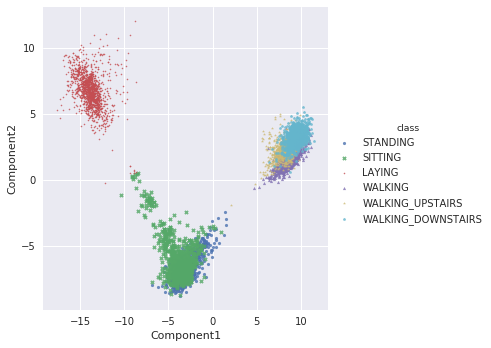

In [40]:
lda.fit(new_x_data, y_data)
predicted_train = lda.predict(new_x_data)
transform_points = lda.fit_transform(new_x_data, y_data)
transform_data = pd.DataFrame(transform_points)
transform_data.columns = ['Component1', 'Component2']
transform_data['class'] = np.asarray(predicted_train)
sns.lmplot( x="Component1", y="Component2", data=transform_data, fit_reg=False, hue='class', legend=True, markers=["o", "x", ".", "^", "*", "p"], scatter_kws={'s': 10})


### SVM

In [41]:
clf = sk.svm.SVC(decision_function_shape='ovo')
clf.fit(new_x_data, y_data)  
pred1 = clf.predict(new_x_test)
print(sk.metrics.accuracy_score(y_test, pred1))

0.9290804207668816


### Tree-Based

In [42]:
clf1 = sk.tree.DecisionTreeClassifier()
clf1 = clf1.fit(new_x_data, y_data)
pred2 = clf1.predict(new_x_test)
print(sk.metrics.accuracy_score(y_test, pred2))

0.8527315914489311


## Analysis Slides

With the entire dataset, we first performed KNN, LDA, SVM, and a Tree-Based approach in order to perform human activity recognition. As can be seen, rate of correct classifications are fairly high for all of the different statistical methods performed, noting that LDA has an obscenely high rate of correct classifications (96.4%)!. However, this uses all of the data and thus the model is fairly complex.

| Model      | % Correct   |
|:----------:|:-----------:|
| KNN        |83.2%        |
| LDA        |96.4%        |
| SVM        |93.1%        |
| Tree-Based |85.7%        |



In order to perform more meaningful analysis on the data set, we wanted to subset the data further. One way was to split up the time and frequency data. The given dataset had both, but we wondered if splitting up the data in this way woudl substantially change our rate of correct classifications. As can be seen in the results, there's no clear subset of data that is better. Although all models for each subset of data perform reasonably well, KNN and LDA have higher classification rates for the time subset of the data, and SVM and Tree-Based have higher classification rates for the frequency subset of the data. 

| Model      | Time % Correct | Freq. % Correct |
|:----------:|:--------------:|:---------------:|
| KNN        | 88.2%          | 79.3%           |
| LDA        | 96.3%          | 86.8%           |
| SVM        | 83.8%          | 93.8%           |
| Tree-Based | 77.2%          | 82.7%           |

The dataset has 563 variables in it, so using all of the variables as predictors means that we have a fairly complex model. So, we decided to use dimension reduction techniques, specifically, we performed feature selection using SVM. This feature selection reduced 563 variables down to 100 variables - still a fair amount of data but significantly less complex. As seen below, the results were also relatively similar. However, the models themselves are less complex and more interpretable, making them a better overall statistical model. Of these, LDA is the best, having a 94.5% accuracy rate.

| Model      | % Correct   |
|:----------:|:-----------:|
| KNN        |82.6%        |
| LDA        |94.5%        |
| SVM        |93.0%        |
| Tree-Based |83.9%        |